In [153]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [154]:
sheet1=pd.read_csv("startup_funding2018.csv")
sheet2=pd.read_csv("startup_funding2019.csv")
sheet3=pd.read_csv("startup_funding2020.csv")
sheet4=pd.read_csv("startup_funding2021.csv")

In [155]:
print(sheet1.shape,sheet2.shape,sheet3.shape,sheet4.shape)

(526, 6) (89, 9) (1055, 10) (1209, 9)


In [156]:
sheet1.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [157]:
sheet2.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [158]:
sheet3.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN


In [159]:
sheet4.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


In [160]:
sheet2['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [161]:
sheet1.rename(columns = {'Company Name':'Company/Brand', 'Industry':'Sector',
                              'Round/Series':'Stage', 'Amount':'Amount($)',
                        'Location':'HeadQuarter', 'About Company':'What it does'}, inplace = True)

In [162]:
sheet3.drop(columns=['Unnamed: 9'], axis=1, inplace = True)

In [163]:
sheet1["Founded"] = np.nan
sheet1["Founders"] = np.nan
sheet1["Investor"] = np.nan


In [166]:
def amountCleaner(sheet):
    sheet['Amount($)'] = sheet['Amount($)'].apply(lambda x: str(x).replace('—','NaN').replace(',','').replace('Undisclosed','NaN').replace('Upsparks','NaN').replace('Series C','NaN').replace('undisclosed','NaN').replace('ah! Ventures','NaN').replace('Pre-series A','NaN').replace('ITO Angel Network LetsVenture','NaN').replace('JITO Angel Network LetsVenture','NaN').replace('Seed','NaN').replace('JNaN','NaN').replace('800000000 to 850000000','825000000').replace('Undiclsosed','').replace('887000 23000000','11943500').replace('Undislosed','NaN').replace('$',''))
amountCleaner(sheet1)

#convert rupees to dollars if it has rupees sign
sheet1['Amount($)'] = sheet1['Amount($)'].apply(lambda x: float(str(x).replace('₹','')) if '₹' in x else x) 


In [167]:
amountCleaner(sheet2)
amountCleaner(sheet3)
amountCleaner(sheet4)

In [168]:
sheet1['Amount($)'] = sheet1['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet2['Amount($)'] = sheet2['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet3['Amount($)'] = sheet3['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet4['Amount($)'] = sheet4['Amount($)'].replace('NaN',np.nan).replace('nan',np.nan)
sheet1['Amount($)'] = pd.to_numeric(sheet1['Amount($)'], downcast = 'float')
sheet2['Amount($)'] = pd.to_numeric(sheet2['Amount($)'], downcast = 'float')
sheet3['Amount($)'] = pd.to_numeric(sheet3['Amount($)'],errors='coerce', downcast = 'float')
sheet4['Amount($)'] = pd.to_numeric(sheet4['Amount($)'], downcast = 'float')




In [169]:
sheet1[['HeadQuarter','s','f']] = sheet1['HeadQuarter'].str.split(', ',expand=True)
sheet1.drop(columns=['s','f'], axis=1, inplace = True)

In [173]:
sheet1.sample(1)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
83,Carmesi,Health Care,Seed,4080000.0,Gurgaon,Carmesi is a brand of high-end menstrual-hygie...,<NA>,NaN,NaN


In [174]:
sheet2['Sector'] = sheet2['Sector'].replace('Ecommerce','E-commerce')
sheet2['Sector'].unique()

array(['E-commerce', 'Edtech', 'Interior design', 'AgriTech',
       'Technology', 'SaaS', 'AI & Tech', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [175]:
# Convert the various sheet to it respective data types
# Sheet1
sheet1['Founded'] = sheet1['Founded'].astype('Int64')
sheet1['Founders'] = sheet1['Founders'].astype('object')
sheet1['Investor'] = sheet1['Investor'].astype('object')

# Sheet 2
sheet2['Founded'] = sheet2['Founded'].astype('Int64')

# Sheet 3
sheet3['Founded'] = sheet3['Founded'].replace('-',np.nan)
sheet3['Founded'] = sheet3['Founded'].astype('Int64')

# Sheet 4
sheet4['Founded'] = sheet4['Founded'].astype('Int64')


In [176]:
Data = pd.concat([sheet1,sheet2,sheet3,sheet4])
Data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",<NA>,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4800000.0,Mumbai,A startup which aggregates milk from dairy far...,<NA>,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,7800000.0,Gurgaon,Leading Online Loans Marketplace in India,<NA>,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,<NA>,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [177]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1941 non-null   object 
 3   Amount($)      2318 non-null   float64
 4   HeadQuarter    2765 non-null   object 
 5   What it does   2879 non-null   object 
 6   Founded        2110 non-null   Int64  
 7   Founders       2334 non-null   object 
 8   Investor       2253 non-null   object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 227.7+ KB


In [178]:
(Data.duplicated()).sum()

23

In [179]:
Data.loc[Data.duplicated(),:]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",<NA>,NaN,NaN
145,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
205,Nykaa,Cosmetics,NaN,NaN,Mumbai,Nykaa is an online marketplace for different b...,2012,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
362,Byju’s,EdTech,NaN,500000000.0,Bangalore,An Indian educational technology and online tu...,2011,Byju Raveendran,"Owl Ventures, Tiger Global Management"
107,Curefoods,Food & Beverages,NaN,13000000.0,Bangalore,Healthy & nutritious foods and cold pressed ju...,2020,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal"
109,Bewakoof,Apparel & Fashion,NaN,8000000.0,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2012,Prabhkiran Singh,InvestCorp
111,FanPlay,Computer Games,$1200000,NaN,Computer Games,A real money game app specializing in trivia g...,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
117,Advantage Club,HRTech,NaN,1700000.0,Mumbai,Advantage Club is India's largest employee eng...,2014,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah"
119,Ruptok,FinTech,NaN,1000000.0,New Delhi,Ruptok fintech Pvt. Ltd. is an online gold loa...,2020,Ankur Gupta,Eclear Leasing
243,Trinkerr,Capital Markets,Series A,6600000.0,Bangalore,Trinkerr is India's first social trading platf...,2021,"Manvendra Singh, Gaurav Agarwal",Accel India


In [180]:
Data.drop_duplicates(keep='first')

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",<NA>,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4800000.0,Mumbai,A startup which aggregates milk from dairy far...,<NA>,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,7800000.0,Gurgaon,Leading Online Loans Marketplace in India,<NA>,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,<NA>,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [181]:
replaced_data = {
    'Seed': 'Seed',
    'Series A': 'Series A',
    'Angel': 'Angel',
    'Series B': 'Series B',
    'Pre-Seed': 'Pre-Seed',
    'Private Equity': 'Private Equity',
    'Venture - Series Unknown': 'Series Unknown',
    'Grant': 'Grant',
    'Debt Financing': 'Debt Financing',
    'Post-IPO Debt': 'Post-IPO Debt',
    'Series H': 'Series H',
    'Series C': 'Series C',
    'Series E': 'Series E',
    'Corporate Round': 'Corporate Round',
    'Undisclosed': 'Undisclosed',
    'Series D': 'Series D',
    'Secondary Market': 'Secondary Market',
    'Post-IPO Equity': 'Post-IPO Equity',
    'Non-equity Assistance': 'Non-equity Assistance',
    'Funding Round': 'Funding Round',
    'Fresh funding': 'Fresh funding',
    'Pre series A': 'Pre-Series A',
    'Series G': 'Series G',
    'Post series A': 'Post-Series A',
    'Seed funding': 'Seed',
    'Seed fund': 'Seed',
    'Series F': 'Series F',
    'Series B+': 'Series B',
    'Seed round': 'Seed',
    'Pre-series A': 'Pre-Series A',
    'Pre-seed': 'Pre-Seed',
    'Pre-series': 'Pre-Series',
    'Debt': 'Debt Financing',
    'Pre-series C': 'Pre-Series C',
    'Pre-series B': 'Pre-Series B',
    'Bridge': 'Bridge',
    'Series B2': 'Series B',
    'Pre- series A': 'Pre-Series A',
    'Edge': 'Edge',
    'Pre-Series B': 'Pre-Series B',
    'Seed A': 'Seed',
    'Series A-1': 'Series A',
    'Seed Funding': 'Seed',
    'Pre-seed Round': 'Pre-Seed',
    'Seed Round & Series A': 'Seed',
    'Pre Series A': 'Pre-Series A',
    'Pre seed Round': 'Pre-Seed',
    'Angel Round': 'Angel',
    'Pre series A1': 'Pre-Series A',
    'Series E2': 'Series E',
    'Seed Round': 'Seed',
    'Bridge Round': 'Bridge',
    'Pre seed round': 'Pre-Seed',
    'Pre series B': 'Pre-Series B',
    'Pre series C': 'Pre-Series C',
    'Seed Investment': 'Seed',
    'Series D1': 'Series D',
    'Mid series': 'Mid-Series',
    'Series C, D': 'Series C',
    '$1200000': 'Other',
    'Seed+': 'Seed',
    'Series F2': 'Series F',
    'Series A+': 'Series A',
    'Series B3': 'Series B',
    'PE': 'Private Equity',
    'Series F1': 'Series F',
    'Pre-series A1': 'Pre-Series A',
    '$300000': 'Other',
    'Early seed': 'Seed',
    '$6000000': 'Other',
    '$1000000': 'Other',
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Other'
}

Data['Stage'].replace(replaced_data, inplace=True)


In [182]:
Data.isnull().sum()

Company/Brand      0
Sector            18
Stage            938
Amount($)        561
HeadQuarter      114
What it does       0
Founded          769
Founders         545
Investor         626
dtype: int64

In [183]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1941 non-null   object 
 3   Amount($)      2318 non-null   float64
 4   HeadQuarter    2765 non-null   object 
 5   What it does   2879 non-null   object 
 6   Founded        2110 non-null   Int64  
 7   Founders       2334 non-null   object 
 8   Investor       2253 non-null   object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 227.7+ KB


In [184]:
imputer = SimpleImputer(strategy='mean')
Data['Amount($)'] = imputer.fit_transform(Data[['Amount($)']])
Data['Founded'] = imputer.fit_transform(Data[['Founded']]).astype('int')






In [185]:
# Data['Stage'] = Data['Stage'].replace(Data['Stage'].isnull(),Data['Stage'].value_counts()[0])
Data['Stage'].fillna(Data['Stage'].mode()[0], inplace=True)
Data['Sector'].fillna(Data['Sector'].mode()[0], inplace=True)
Data['HeadQuarter'].fillna(Data['HeadQuarter'].mode()[0], inplace=True)
Data['Founders'].fillna(Data['Founders'].mode()[0], inplace=True)
Data['Investor'].fillna(Data['Investor'].mode()[0], inplace=True)

In [186]:
# Data[Data['Stage'].isnull()]

In [187]:
# Data[Data['Stage'] == np.NaN]
Data['Stage'].value_counts()

Stage
Seed                     1634
Series A                  307
Pre-Series A              291
Series B                  138
Series C                  115
Pre-Seed                   73
Debt Financing             58
Series D                   52
Angel                      41
Series Unknown             37
Series E                   31
Pre-Series B               18
Series F                   13
Private Equity             11
Bridge                      9
Corporate Round             8
Other                       7
Series H                    4
Grant                       4
Pre-Series C                3
Pre-Series                  3
Series G                    3
Secondary Market            3
Post-IPO Equity             3
Undisclosed                 2
Post-IPO Debt               2
Fresh funding               1
Post-Series A               1
Funding Round               1
Non-equity Assistance       1
Edge                        1
Mid-Series                  1
Seies A                     1
Seri

In [188]:
# Data[Data['Amount($)'].isnull()]
Data['Founded'].value_counts()

Founded
2016    997
2019    285
2020    279
2015    277
2018    272
2017    209
2014    137
2021     76
2012     74
2011     68
2013     64
2010     34
2008     34
2009     16
2007     10
2006      9
2000      6
2004      4
2002      3
1998      3
1999      3
1994      3
1989      2
1995      2
2005      2
1978      2
1973      1
2001      1
1993      1
1982      1
2003      1
1991      1
1984      1
1963      1
Name: count, dtype: int64

In [189]:
# Data[Data['Sector']=='np.nan']

In [190]:
# replaced_sector = {
#     'Technology and Software': ['Artificial Intelligence',
# 'IoT (Internet of Things)']
# }
# imputer1 = SimpleImputer(strategy='constant',fill_value='Technology',missing_values='')

# Data['Sector'] = imputer1.fit_transform(Data[['Sector']])
Data.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Founded          0
Founders         0
Investor         0
dtype: int64

In [191]:
# Data['Investor'].replace('np.NaN',' ')

In [192]:
 Data.head(5)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4.800000e+06,Mumbai,A startup which aggregates milk from dairy far...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,7.800000e+06,Gurgaon,Leading Online Loans Marketplace in India,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
3,PayMe India,"Financial Services, FinTech",Angel,2.000000e+06,Noida,PayMe India is an innovative FinTech organizat...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1.251712e+08,Hyderabad,Eunimart is a one stop solution for merchants ...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures


In [193]:
Data.shape

(2879, 9)

In [194]:
Data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli, Tamilnadu', 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, C

In [195]:
Data.drop_duplicates(keep='first')

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4.800000e+06,Mumbai,A startup which aggregates milk from dairy far...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,7.800000e+06,Gurgaon,Leading Online Loans Marketplace in India,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
3,PayMe India,"Financial Services, FinTech",Angel,2.000000e+06,Noida,PayMe India is an innovative FinTech organizat...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1.251712e+08,Hyderabad,Eunimart is a one stop solution for merchants ...,2016,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-Series A,3.000000e+06,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,2.000000e+07,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,5.500000e+07,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,2.600000e+07,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [196]:
Data.describe()

,Amount($),Founded
count,2.879000e+03,2879.000000
mean,1.251712e+08,2016.058354
std,3.085711e+09,3.739344
min,9.600000e+00,1963.000000
25%,1.200000e+06,2015.000000
50%,6.000000e+06,2016.000000
75%,1.000000e+08,2018.000000
max,1.500000e+11,2021.000000


# #The Total Amount Invested in INDIAN STARTUP by ventures in period 2018-2021 was $359638579586.4955


In [197]:
Data['Amount($)'].sum()

360367778541.3389

# 1. Which company has the highest amount of funds?

In [198]:
top_companies=Data.groupby("Company/Brand")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False)
top_companies 

,Company/Brand,Amount($)
70,Alteria Capital,1.500000e+11
1556,Reliance Retail Ventures Ltd,7.000000e+10
1726,Snowflake,3.000000e+09
2021,Vistara,2.400000e+09
1553,Reliance,2.200000e+09
...,...,...
759,Glii,1.000000e+04
126,AuthMetrik,1.000000e+04
1212,Mombay,7.500000e+03
1393,Peel Works,4.223000e+01


C:\Users\bhush\AppData\Local\Temp\ipykernel_6712\2344257481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


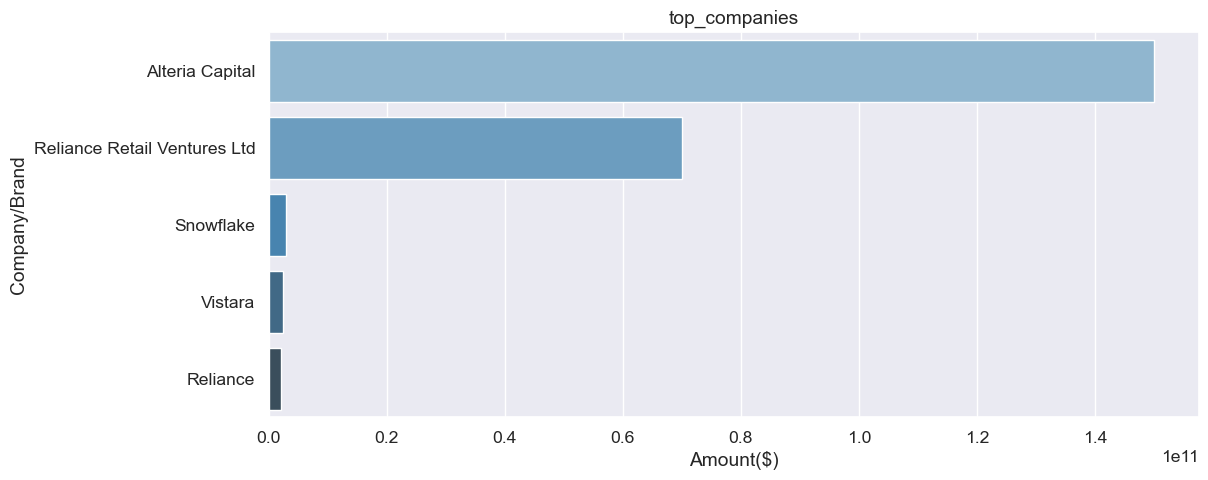

In [199]:
fig = plt.figure(figsize=(12,5))
plt.title("top_companies")
sns.barplot(data=top_companies.iloc[:5] , x="Amount($)", y="Company/Brand", palette='Blues_d')

fig.show()

# 2. Which location has the minimum startup funds?

In [200]:
Location_with_least_amount = Data.groupby("HeadQuarter")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=True)
Location_with_least_amount

,HeadQuarter,Amount($)
67,Kota,1.200000e+04
101,Ranchi,1.000000e+05
91,Panchkula,1.000000e+05
29,"Dhingsara, Haryana",1.000000e+05
41,Guntur,1.300000e+05
...,...,...
97,Pune,5.112383e+09
43,Gurugram,9.222139e+09
81,New Delhi,1.102981e+10
9,Bangalore,4.820646e+10


C:\Users\bhush\AppData\Local\Temp\ipykernel_6712\470690615.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


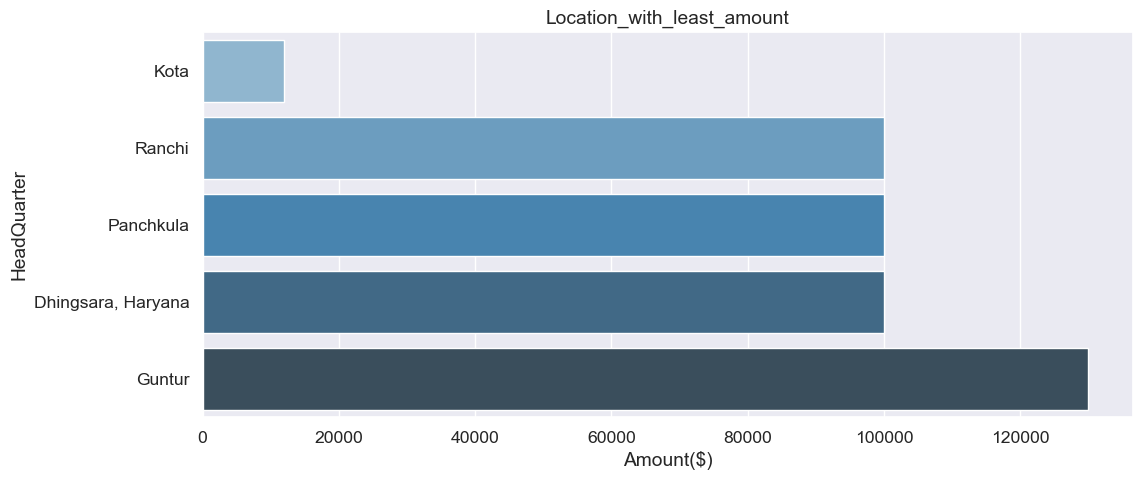

In [201]:
fig = plt.figure(figsize=(12,5))
plt.title("Location_with_least_amount")
sns.barplot(data=Location_with_least_amount.iloc[:5] , x="Amount($)", y="HeadQuarter", palette='Blues_d')
fig.show()

# 3.In which sector has the top 5 investors.

In [202]:
Top_Sectors = Data.groupby("Sector")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False).iloc[:5]
Top_Sectors

,Sector,Amount($)
445,FinTech,1.568855e+11
757,Retail,7.079272e+10
385,EdTech,7.139083e+09
394,Edtech,4.406706e+09
374,E-commerce,3.636379e+09


C:\Users\bhush\AppData\Local\Temp\ipykernel_6712\2769746148.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


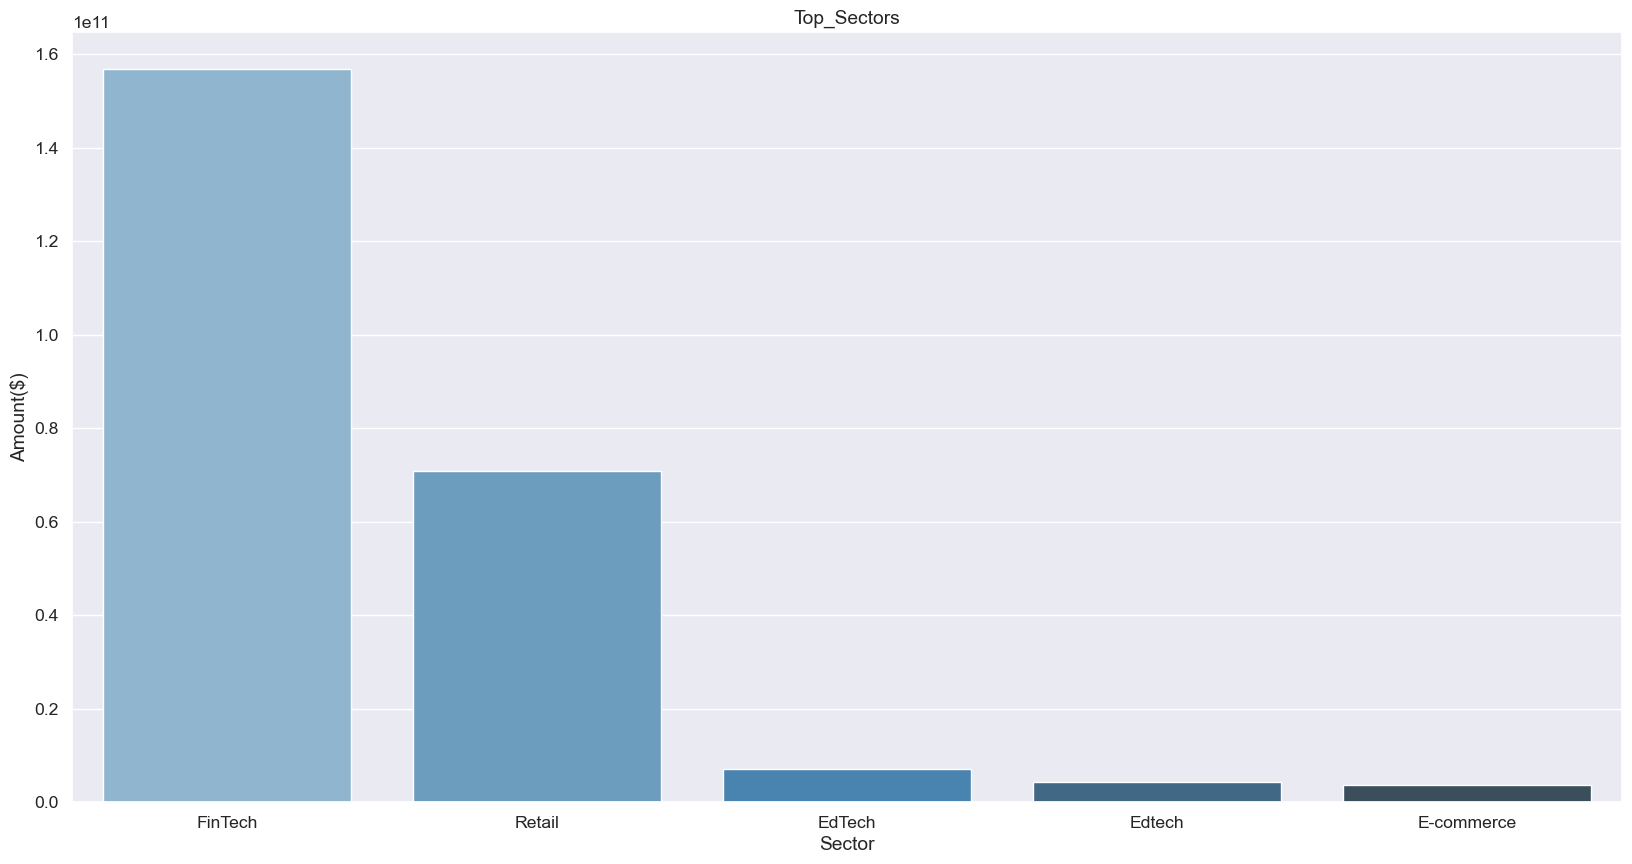

In [203]:
fig = plt.figure(figsize=(20,10))
plt.title("Top_Sectors")
sns.barplot(data=Top_Sectors.iloc[:5] , y="Amount($)", x="Sector", palette='Blues_d')
fig.show()

 # 4. How much did the investors contributed in Delhi and Mumbai?

In [204]:
D1 = Data.iloc[:,[4,3]]
x = ['Delhi','Mumbai']
D2 = D1[D1.HeadQuarter.isin(x)]
D2.groupby("HeadQuarter")["Amount($)"].sum().reset_index().sort_values(by="Amount($)",ascending=False)

,HeadQuarter,Amount($)
1,Mumbai,2.454640e+11
0,Delhi,4.519896e+09


C:\Users\bhush\AppData\Local\Temp\ipykernel_6712\1685587422.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


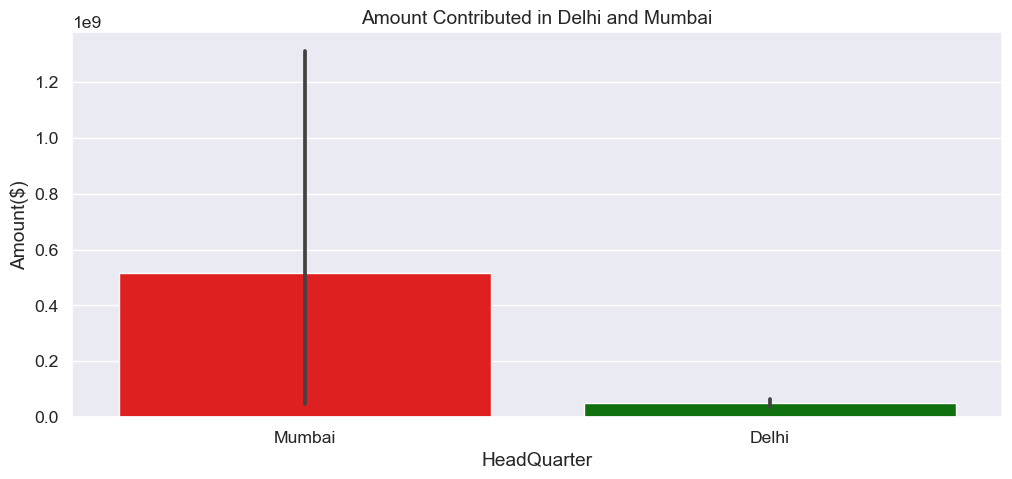

In [205]:
fig = plt.figure(figsize=(12,5))
plt.title("Amount Contributed in Delhi and Mumbai")
sns.barplot(data=D2 , y="Amount($)", x="HeadQuarter", palette=['red','green'])
fig.show()


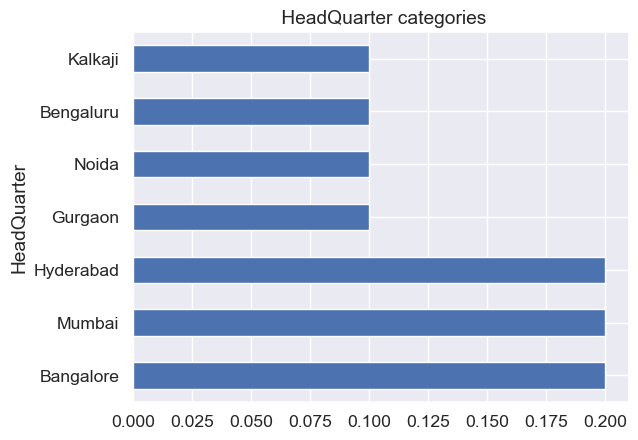

In [206]:
Data['HeadQuarter'].value_counts(normalize=True)
plt.title(' HeadQuarter categories')
Data['HeadQuarter'].iloc[:10].value_counts(normalize=True).plot.barh()
plt.show()

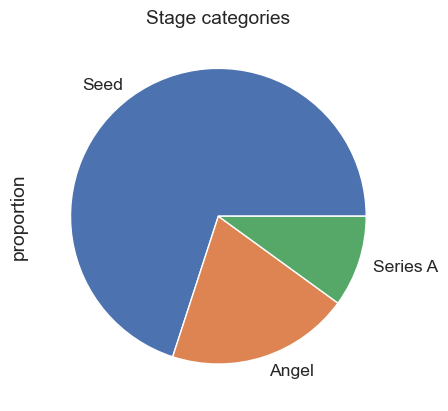

In [207]:
Data['Stage'].value_counts(normalize=True)

plt.title('Stage categories')
Data['Stage'].iloc[:10].value_counts(normalize=True).plot.pie()
plt.show()

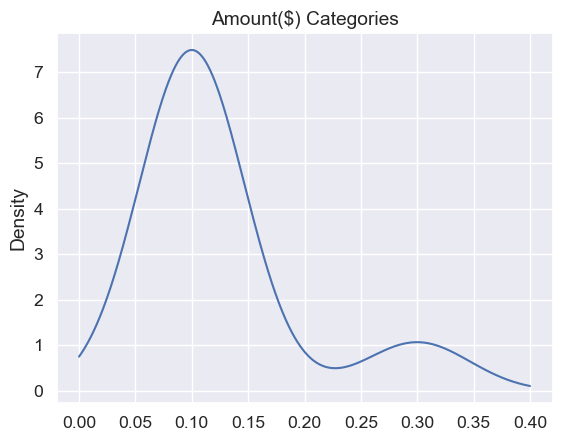

In [208]:
Data['Amount($)'].value_counts(normalize=True)

plt.title('Amount($) Categories')
Data['Amount($)'].iloc[:10].value_counts(normalize=True).plot.kde()
plt.show()

In [209]:
mydf = Data[['Amount($)','Founded']]
mydf.corr()

,Amount($),Founded
Amount($),1.000000,-0.018583
Founded,-0.018583,1.000000


In [210]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2879 non-null   object 
 3   Amount($)      2879 non-null   float64
 4   HeadQuarter    2879 non-null   object 
 5   What it does   2879 non-null   object 
 6   Founded        2879 non-null   int32  
 7   Founders       2879 non-null   object 
 8   Investor       2879 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 213.7+ KB


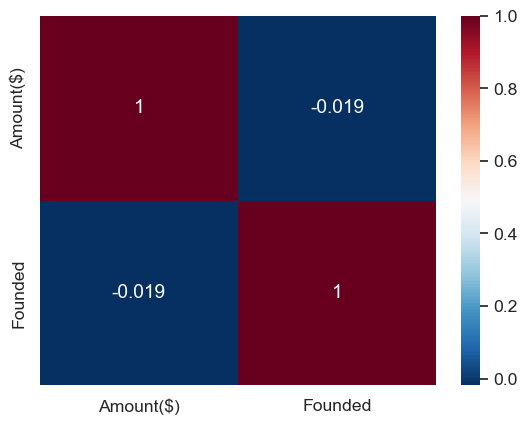

In [211]:
sns.set(font_scale = 1.15)

sns.heatmap(
    mydf.corr(),
    cmap = 'RdBu_r',
    annot = True);

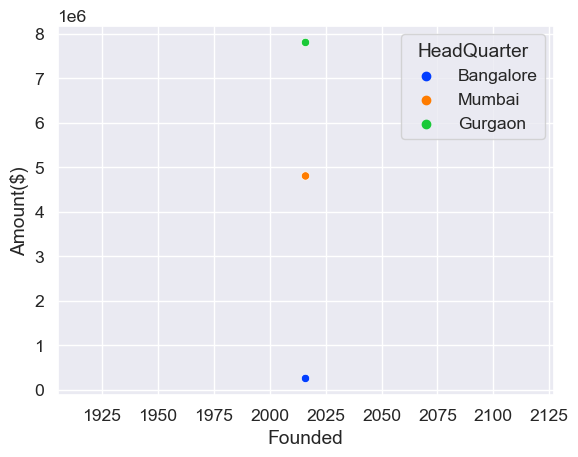

In [212]:
sns.scatterplot(
    y = 'Amount($)',
    x = 'Founded',
    data = Data.iloc[:3],
    palette = 'bright',
    hue = 'HeadQuarter');

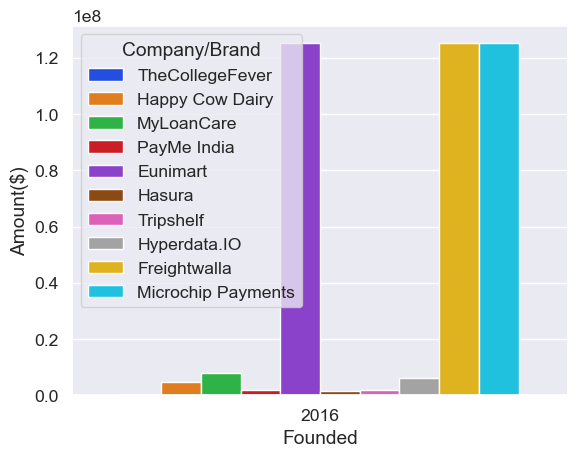

In [213]:
sns.barplot(
    y = 'Amount($)',
    x = 'Founded',
    data = Data.iloc[:10],
    palette = 'bright',
    hue = 'Company/Brand');

In [232]:
# sns.barplot(x=Data['Founded'].value_counts().iloc[:5],y=Data['Amount($)'])
Data['Amount($)'].mean()

125171163.09181623

In [249]:
# if (Data['Amount($)'] > Data['Amount($)'].mean()) & Data['HeadQuarter'].isin(Data['HeadQuarter'].value_counts().index[0:6]) & Data['Sector'].isin(Data['Sector'].value_counts().index[0:6]):
#     Data['isSuccessFull'] = 1
# else:
#     Data['isSuccessFull'] = 0    

In [263]:
Data.drop(columns=['What it does','Founders','Investor'],inplace=True)

In [298]:
Data.drop(columns=['Company/Brand'],inplace=True)

# #Let's take an condition for a startup to be successfull, it Should be of top 10 sector, its headquater is located in 10 cities and its funding value is greater than the mean.


In [299]:
def calculate_success(df):
    condition = (df['Amount($)'] > df['Amount($)'].mean()) & df['HeadQuarter'].isin(df['HeadQuarter'].value_counts().index[0:11]) & df['Sector'].isin(df['Sector'].value_counts().index[0:11])
    df['isSuccessFull'] = condition.astype(int)

    return df

result_data = calculate_success(Data)

In [300]:
Data['isSuccessFull'].value_counts()

isSuccessFull
0    2845
1      34
Name: count, dtype: int64

In [301]:
Data['HeadQuarter'].value_counts().index[0:6]

Index(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Chennai', 'Pune'], dtype='object', name='HeadQuarter')

In [302]:
Data['Sector'].value_counts().index[0:6]

Index(['FinTech', 'EdTech', 'Fintech', 'Financial Services', 'E-commerce',
       'Edtech'],
      dtype='object', name='Sector')

In [303]:
Data.shape

(2879, 6)

In [304]:
Data.keys()

Index(['Sector', 'Stage', 'Amount($)', 'HeadQuarter', 'Founded',
       'isSuccessFull'],
      dtype='object')

In [305]:
Data.to_csv('Startup_Data.csv',index=False)

In [306]:
Data.sample()

,Sector,Stage,Amount($),HeadQuarter,Founded,isSuccessFull
1162,Biotechnology,Seed,1000000.0,Bangalore,2020,0


In [307]:
# df2.head()

In [308]:
x = Data.drop(['isSuccessFull'],axis=1)
y = Data['isSuccessFull']

In [309]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [311]:
x_train

,Sector,Stage,Amount($),HeadQuarter,Founded
1102,FinTech,Seed,2.300000e+06,Gurugram,2020
872,Fintech,Series B,3.000000e+07,Mumbai,2014
55,Games,Seed,1.251712e+08,Mumbai,2014
357,Eyeglasses,Seed,3.000000e+06,Chennai,2011
690,Media,Seed,1.251712e+08,Mumbai,2019
...,...,...,...,...,...
844,HealthCare,Pre-Series A,5.000000e+06,Orissia,2017
677,EdTech,Other,1.251712e+08,Ahmadabad,2015
993,Fintech,Seed,2.500000e+05,Noida,2019
871,Computer Software,Seed,1.251712e+08,Hyderabad,2019


In [312]:
x_test

,Sector,Stage,Amount($),HeadQuarter,Founded
23,Safety tech,Seed,1.251712e+08,Delhi,2018
611,Fintech,Pre-Seed,1.251712e+08,Bangalore,2019
158,"Information Services, Information Technology",Corporate Round,1.251712e+08,Mumbai,2016
1142,FinTech,Seed,1.000000e+06,Mumbai,2020
119,Entertainment,Seed,1.000000e+06,Indore,2019
...,...,...,...,...,...
280,Information Technology & Services,Seed,1.600000e+06,Hyderabad,2014
840,Fintech,Series A,7.000000e+06,Bangalore,2015
40,Tyre management,Seed,1.251712e+08,Jaipur,2016
206,Apparel & Fashion,Series A,2.000000e+07,Gurugram,2020


In [313]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector         2879 non-null   object 
 1   Stage          2879 non-null   object 
 2   Amount($)      2879 non-null   float64
 3   HeadQuarter    2879 non-null   object 
 4   Founded        2879 non-null   int32  
 5   isSuccessFull  2879 non-null   int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 199.5+ KB


In [316]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

tnf1 = ColumnTransformer(transformers=[('tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3])],remainder='passthrough')
tnf2 = LogisticRegression()

pipe = Pipeline([
    ('tnf1',tnf1),
    ('tnf2',tnf2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score from LR is:',r2_score(y_test,y_pred))
print('MAE Score from LR is:',mean_absolute_error(y_test,y_pred))

C:\Users\bhush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories ['Medical, Tourism', 'Telecommuncation', 'Med Tech', 'eMobility', 'Mobile, Mobile Apps, Personalization, Test and Measurement, Web Apps', 'Digital Entertainment, Mobile, PC Games', 'Information Technology, SaaS, Security', 'Delivery Service, Food and Beverage, Food Delivery', 'Energy, Natural Resources', 'AI Chatbot', 'Beauty, Cosmetics, Health Care, Service Industry', 'Cybersecurity', 'Children, Education, Parenting', 'Battery, Electric Vehicle, Energy, Renewable Energy, Transportation', 'EdTech, Education, Higher Education, Secondary Education', 'Cannabis startup', 'Femtech', 'Mobility tech', 'Fantasy sports', 'Consumer Lending, Finance, FinTech', 'Apps, Mobile, Mobile Apps, Software', 'B2B, Biometrics, Cyber Security, Fraud Detection, SaaS, Security', 'Augmented reality', 'Big Data, Business Intelligence, Financial Services, FinTech, Personal Finance', 'Housing & Rentals', 'Food Processing, Retail', 'Data Science', 'Cloud Computing, Computer, SaaS, Software', 'Blogging', 'Automotive, E-Commerce, Mobile', 'Crowdsourcing, Financial Services, Funding Platform, Venture Capital', 'Education, Gaming, Training', 'Food & tech', 'Health Care, Medical, Pharmaceutical', 'Clothing', 'Company-as-a-Service', 'Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant', 'Fitness, Food and Beverage, Health Care, Nutrition', 'Apps, Home Services, Information Services, Information Technology', 'Food and Beverage, Food Processing, Nutrition', 'Media Tech', 'OTT', 'E-Commerce, Mobile, Retail', 'E-Commerce Platforms, Retail, SaaS', 'B2B, Business Development, Internet, Marketplace', 'Food and Beverage, Food Processing, Organic Food, Snack Food', 'Telecommunication', 'Video', 'Apps, Beauty, Consumer, Retail', 'Biotech', 'Travel tech', 'EdTech, Education, Information Services, SaaS', 'Tyre management', 'Milk startup', 'Communities, Coworking, Incubators', 'Online Games, Software', 'Nanotechnology', 'Food Delivery, Food Processing, Internet', 'Matrimony', 'Automotive company', 'Internet, Social News, Sports', 'Finance, Impact Investing, Internet', 'Apps, Audio', 'MarTech', 'Music Streaming', 'Fantasy Sports, Mobile, Sports', 'Big Data, Consumer Lending, FinTech', 'Celebrity Engagement', 'Media & Networking', 'Environmental Consulting, Renewable Energy', 'E-Learning, Education, Higher Education', 'Water purification', 'Dating app', 'Equity Management', 'Biotechnology, Life Science, Pharmaceutical, Product Research', 'B2B Marketplace', 'B2B Supply Chain', 'EdTech, Education, Enterprise Software, Peer to Peer', 'E-Commerce, Food and Beverage, Internet', 'Foootwear', 'Hospitality, Hotel, Leisure, Travel', 'Fitness, Sporting Goods, Sports', 'Automotive, Search Engine, Service Industry', 'Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media and Entertainment', 'Location Analytics', 'E-Commerce, Health Care, Retail', 'Digital Entertainment, Fantasy Sports, Gaming, Sports', 'AI Startup', 'Banking, Financial Services, Internet', 'Aviation & Aerospace', 'Hospital', 'Legal Services', 'FinTech, Internet, Payments, Service Industry', 'Automotive, Electric Vehicle, Energy', 'Electric Vehicle', 'PaaS startup', 'Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development', 'Logistics, Railroad, Transportation', 'E-Commerce, E-Commerce Platforms, Furniture, Home Decor, Internet', 'Internet, Marketplace, Shopping', 'Fashion & Lifestyle', 'Basketball, Cricket, Cycling, eSports, Fitness, Golf, Health Care, Hockey, Sports, Swimming, Table Tennis, Volley Ball', 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software', 'Manufacturing, Retail', 'E-Commerce, Retail, Shopping', 'Conversational AI platform', 'Networking platform', 'Vehicle repair startup', 'Training', 'E-Learning, Internet, Video Games', 'Aviation', 'Marketplace, Real Estate, Rental Property', 'Food delivery', 'Safety tech', 'AR platform', 'Scanning app', 'Nutrition tech', 'B2B, Food and Beverage, Food Delivery', 'Artificial Intelligence, Computer, Machine Learning', 'Skill development', 'Digital Entertainment', 'Skincare startup', 'Linguistic Spiritual', 'Digital Marketing, SEM, SEO, Web Development', 'Delivery, Information Technology, Mobile Apps', 'Video streaming platform', 'Video sharing platform', 'Retail Aggregator'] in column 0 during transform

In [315]:
# x_train[x_train.iloc[:]=='FinTech']
# x_train.isnull().sum()

,Sector,Stage,Amount($),HeadQuarter,Founded
1102,FinTech,NaN,NaN,NaN,NaN
872,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN
357,NaN,NaN,NaN,NaN,NaN
690,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
844,NaN,NaN,NaN,NaN,NaN
677,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN
871,NaN,NaN,NaN,NaN,NaN


In [289]:
Data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport